In [2]:
import os,sys
os.getcwd()
sys.path.append("C:\\Users\\user\\Desktop\\dl-from-zscratch-3-main")

In [3]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
y = F.sum(t)

print(y)

variable(231)


In [4]:
y.backward(retain_grad=True)
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

variable(1)
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


In [5]:
x = np.array([[1,2,3],[4,5,6]])
y = np.reshape(x, (6,))
print(y)

[1 2 3 4 5 6]


In [6]:
x = np.array([[1,2,3],[4,5,6]])
y = np.transpose(x)
print(y)

[[1 4]
 [2 5]
 [3 6]]


In [7]:
x = np.random.rand(1,2,3)

#y = x.reshape((2,3))
#y = x.reshape([2,3])
y = x.reshape(2,3)
print(y)

[[0.9567611  0.4497759  0.34798814]
 [0.25532984 0.86131949 0.33568816]]


In [8]:
x = np.array([[1,2,3],[4,5,6]])
y = np.sum(x, keepdims=False)
print(y)
print(y.shape)

21
()


In [9]:
A, B, C, D = 1, 2, 3, 4
x = np.random.rand(A, B, C, D)
y = x.transpose(1,0,3,2)
print(y)

[[[[0.55188615 0.86594909 0.60548041]
   [0.38642321 0.4134412  0.1216667 ]
   [0.24202614 0.67284825 0.31278864]
   [0.0324695  0.00643737 0.29017803]]]


 [[[0.5515138  0.27271306 0.35750477]
   [0.48137907 0.22893711 0.52499263]
   [0.37004367 0.18892312 0.29568122]
   [0.60644511 0.80780461 0.96176742]]]]


In [10]:
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([1,2,3,4,5,6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([1 1 1 1 1 1])


In [11]:
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3],[4,5,6]]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([[1 1 1]
          [1 1 1]])


In [12]:
x = np.array([[1,2,3],[4,5,6]])
y = np.sum(x, axis=0)
print(y)
print(x.shape, '->', y.shape)

[5 7 9]
(2, 3) -> (3,)


In [14]:
x = np.array([[1,2,3],[4,5,6]])
y = np.sum(x, keepdims=True)
print(y)
print(x.shape, '->', y.shape)

[[21]]
(2, 3) -> (1, 1)


In [15]:
x = np.array([1,2,3])
y = np.broadcast_to(x, (2,3))
print(y)

[[1 2 3]
 [1 2 3]]


In [18]:
from dezero.utils import sum_to

x = np.array([[1,2,3],[4,5,6]])
y = sum_to(x, (1,3))
print(y)

[[5 7 9]]


In [19]:
y = sum_to(x, (2,1))
print(y)

[[ 6]
 [15]]


In [21]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

variable([11 12 13])


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100,1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))
#plt.scatter(x, y)

In [14]:
def predict(x):
    y = F.matmul(x, W) + b
    return y

In [15]:
def mean_squared_error(x0, x1):
    diff = x0 - x1 
    return F.sum(diff ** 2) / len(diff)

In [17]:
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.5542803813535926)
variable([[2.21482401]]) variable([4.52705574]) variable(1.4925998690471942)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756932)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227453)
variable([[2.39573972]]) variable([4.9467725]) variable(0.35859153083192785)
variable([[2.425382]]) variable([5.02561369]) variable(0.2491573197756112)
variable([[2.44575118]]) variable([5.08588371]) variable(0.18690658765397886)
variable([[2.45917205]]) variable([5.13217364]) variable(0.15135336296314875)
varia

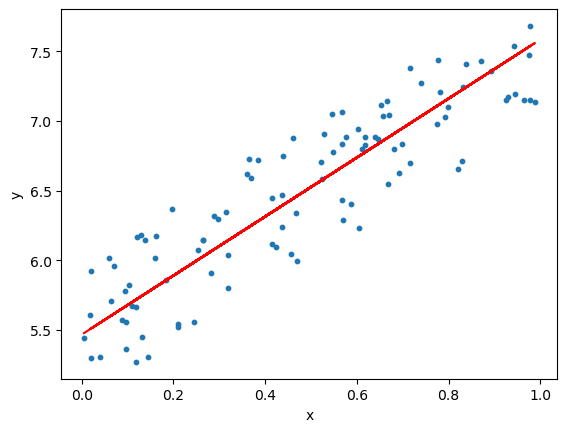

In [19]:
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color='r')
plt.show()

In [30]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

#plt.scatter(x,y, s=10)

In [31]:
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

In [35]:
lr = 0.2
iters = 10000

for i in range(iters):
    y_pred  = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data

    if i  % 1000 == 0:
        print(loss)

variable(0.07698661032692944)
variable(0.07677496339867408)
variable(0.07658271141330998)
variable(0.07640719228812222)
variable(0.07624632377852594)
variable(0.07609843292673374)
variable(0.07617914223635366)
variable(0.07600534867606741)
variable(0.0760417801546744)
variable(0.0758945185577734)


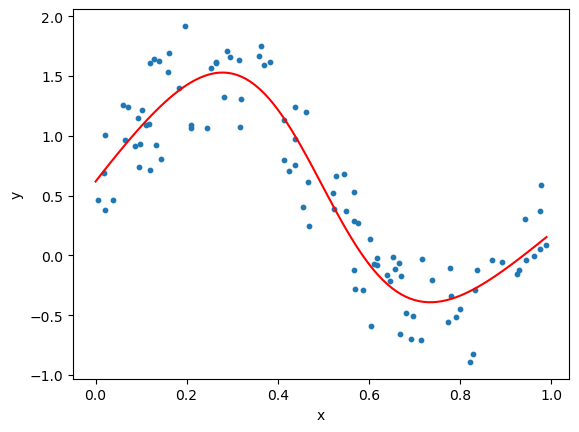

In [36]:
# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()